## Anomaly  Detection by DB-SCAN 

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that can also be used for anomaly detection. Unlike traditional clustering algorithms like k-means, DBSCAN does not require specifying the number of clusters in advance. Instead, it identifies dense regions in the data and groups the samples around those core samples to form clusters. The samples in low-density regions are considered outliers or anomalies [1].

DBSCAN helps in anomaly detection by distinguishing between core samples, boundary samples, and outliers based on their density and proximity. The algorithm defines two important parameters:

Epsilon (eps): It specifies the maximum distance between two samples for them to be considered as neighbors. If the distance between two samples is less than or equal to epsilon, they are considered to be in the same neighborhood.

Minimum samples (min_samples): It specifies the minimum number of samples within the epsilon radius to form a dense region. If the number of samples in a neighborhood is greater than or equal to min_samples, the core sample is identified. Any sample that is not a core sample but falls within the epsilon distance of a core sample is considered a boundary sample.

The DBSCAN algorithm works as follows for anomaly detection:

It starts with a random sample and finds its epsilon-neighborhood, which includes all the samples within the epsilon distance.

If the number of samples in the epsilon-neighborhood is greater than or equal to min_samples, a new cluster is formed. All the samples in the epsilon-neighborhood are added to the cluster, and their epsilon-neighborhoods are explored recursively to find more samples for the cluster.

If a sample is not a core sample but falls within the epsilon distance of a core sample, it is added to the boundary of the corresponding cluster.

If a sample has fewer than min_samples in its epsilon-neighborhood and is not within the epsilon distance of any core sample, it is considered an outlier or anomaly.

By using DBSCAN for anomaly detection, we can identify regions of low density and classify the samples within those regions as anomalies. These anomalies can represent unusual or unexpected behavior in the data. The algorithm is capable of handling irregularly shaped clusters and is not sensitive to the order of the data points [1].

DBSCAN has been implemented in various libraries and frameworks, such as scikit-learn in Python. By setting appropriate values for epsilon and min_samples, DBSCAN can effectively detect anomalies in a dataset. The outliers or anomalies identified by DBSCAN can be visualized separately from the main clusters, allowing for easy interpretation and further analysis [1].

In summary, DBSCAN helps in anomaly detection by clustering the data based on density and identifying samples that do not fit within the dense clusters. It is a powerful algorithm for detecting anomalies in various applications and has advantages over traditional distance-based methods like k-means clustering [1].

## DB-Scan implementation


In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles

In [2]:
X, y = make_circles(n_samples=750, factor=0.3, noise=0.1)

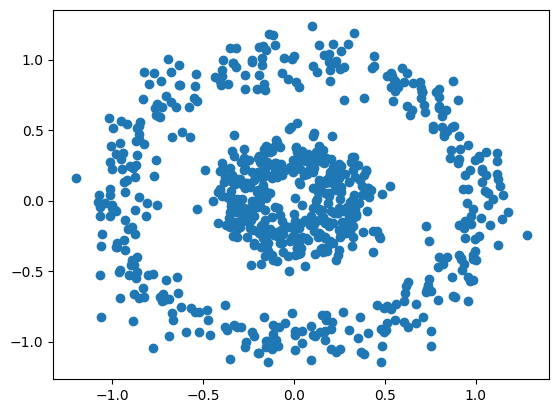

In [3]:
plt.scatter(X[:,0],X[:,1])

In [4]:
from sklearn.cluster import DBSCAN

In [5]:
dbcan=DBSCAN(eps=0.1)

In [6]:
dbcan.fit_predict(X)

array([ 0,  0, -1,  0,  1,  0,  1,  0,  0,  2,  0,  3, -1,  0,  0,  3,  3,
        1,  0,  0,  0, -1,  0,  3,  0,  2,  1,  1,  0,  0,  0,  0, -1,  2,
       -1,  0,  3,  0,  3, -1,  0,  0,  2,  0,  0,  0,  1, -1,  0,  0,  2,
        3,  4,  3,  0,  3,  5,  0,  5, -1,  3,  3,  0,  0,  0,  4,  0,  0,
        0,  3,  0,  4,  0,  1,  3,  0,  0,  3,  0,  0,  0,  0,  0,  1,  6,
        0, -1,  3,  0,  0,  0,  0,  6,  0,  2,  0,  2,  3,  3,  3,  0,  0,
        0,  7,  5,  0,  2,  0,  5,  0,  1,  0,  3,  1,  0,  3,  0,  0,  3,
        2,  0,  2,  1,  0,  0, -1,  0,  0,  0,  3, -1,  3,  0,  0,  0,  0,
        5,  0,  2,  0,  6,  0,  5,  2,  0,  0,  0,  0,  0,  0,  0,  2,  0,
        3,  0,  0,  0,  2,  2, -1,  3,  0,  0,  3,  3,  0,  0,  0,  1, -1,
        0,  0,  0,  3,  0,  0,  6, -1,  0,  2,  6,  5,  6,  5,  0,  0,  3,
        0,  2,  1,  0,  0,  1,  0,  3,  7,  1,  0,  0,  0, -1,  3,  0,  2,
        5,  2,  0,  0, -1,  0,  1, -1,  0,  3,  2,  9,  2,  8,  0,  2,  2,
        7,  3,  0,  6,  2

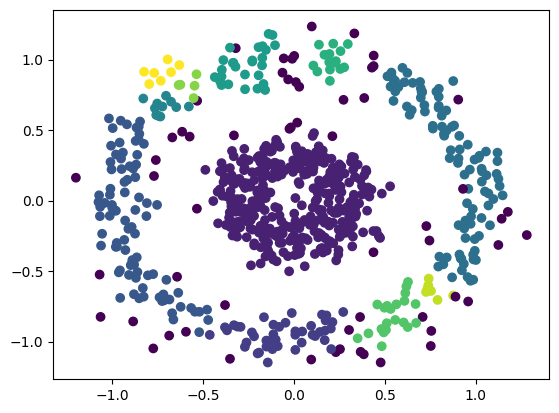

In [7]:
plt.scatter(X[:,0],X[:,1],c=dbcan.labels_)

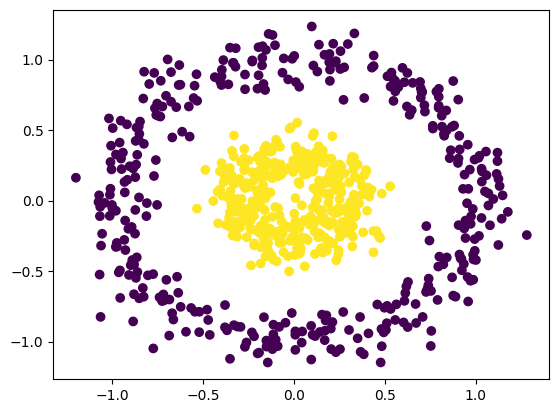

In [8]:
plt.scatter(X[:,0],X[:,1],c=y)

## Local outlier factor Detection

The geometric intuition behind Local Outlier Factor (LOF) detection lies in comparing the local density of a data point with the densities of its neighbors to identify outliers. LOF measures the local deviation of a given data point with respect to its neighbors to detect anomalous data points in anomaly detection tasks [1].

The basic idea of LOF is to estimate the density of a point based on the distances to its k nearest neighbors. By comparing the local density of an object to the densities of its neighbors, one can identify regions of similar density and points that have significantly lower density than their neighbors, which are considered outliers [1].

To calculate the LOF of a data point, the algorithm follows these steps:

For each data point, identify its k nearest neighbors based on distance.
Compute the reachability distance between the data point and its neighbors. The reachability distance is the maximum of the k-distance of the neighbor and the true distance between the data point and the neighbor [1].
Calculate the local reachability density (LRD) of the data point. LRD is the inverse of the average reachability distance of the data point's neighbors.
Compute the LOF of the data point. LOF is the average ratio of the LRD of the data point's neighbors to its own LRD. A value greater than 1 indicates that the data point has a lower density compared to its neighbors, making it an outlier [1].
The reachability distance and local reachability density are important concepts in LOF. The reachability distance measures how reachable an object is from its neighbors, taking into account the density of the neighbors. It helps in identifying objects that are in dense regions and have neighbors with similar density. The local reachability density represents the density of a data point relative to its neighbors, providing a measure of its outlierness [1].

By analyzing the local densities and the relationships between data points and their neighbors, LOF can capture the geometric structure of the dataset and detect outliers that deviate from the expected density patterns. It allows for the identification of both global outliers (deviating from the entire dataset) and local outliers (deviating within a specific neighborhood) [1].

The geometric intuition behind LOF detection can be visualized by considering regions of different densities in a scatter plot. Outliers are often located in regions with substantially lower density compared to their neighbors, indicating their anomalous nature. Plotting the LOF scores as circles with radii proportional to the outlier scores provides a visual representation of the detected outliers [3].

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5540\3769680969.py:37: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[0]._sizes = [10]
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_5540\3769680969.py:38: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  legend.legendHandles[1]._sizes = [20]


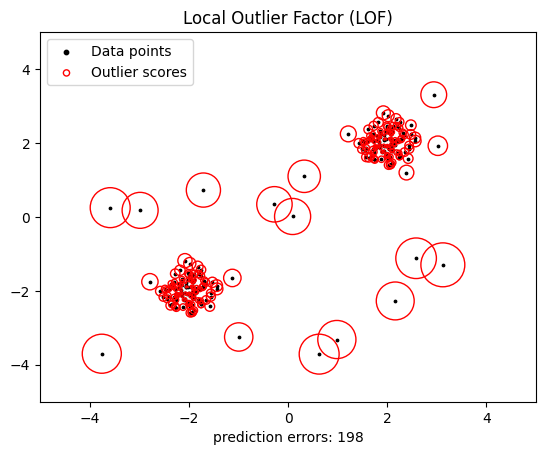

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate random data with outliers
np.random.seed(42)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

# Fit the LOF model for outlier detection
clf = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = clf.fit_predict(X)
X_scores = clf.negative_outlier_factor_

# Create scatter plot of data points
plt.scatter(X[:, 0], X[:, 1], color="k", s=3.0, label="Data points")

# Plot circles with radii proportional to outlier scores
radius = (X_scores.max() - X_scores) / (X_scores.max() - X_scores.min())
plt.scatter(
  X[:, 0],
  X[:, 1],
  s=1000 * radius,
  edgecolors="r",
  facecolors="none",
  label="Outlier scores",
)

plt.title("Local Outlier Factor (LOF)")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel("prediction errors: %d" % (y_pred != -1).sum())
legend = plt.legend(loc="upper left")
legend.legendHandles[0]._sizes = [10]
legend.legendHandles[1]._sizes = [20]
plt.show()


## Local outlier Vs Global Outlier

In [11]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

# Generate random data with outliers
np.random.seed(42)
X = np.random.randn(100, 2)

# Add local outliers
X[20:30] += 4
X[70:80] -= 5

# Fit the LOF model for local outlier detection
local_outlier_detector = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
local_outlier_labels = local_outlier_detector.fit_predict(X)

# Fit the LOF model for global outlier detection
global_outlier_detector = LocalOutlierFactor(n_neighbors=len(X), contamination=0.1)
global_outlier_labels = global_outlier_detector.fit_predict(X)

# Identify local outliers
local_outliers = X[local_outlier_labels == -1]

# Identify global outliers
global_outliers = X[global_outlier_labels == -1]

print("Local Outliers:")
print(local_outliers)
print("\nGlobal Outliers:")
print(global_outliers)


Local Outliers:
[[-4.77254007 -3.69285725]
 [-6.60748323 -4.81536614]
 [-4.74011721 -4.21817713]
 [-6.23695071 -6.32045661]
 [-4.47805843 -4.70301533]
 [-4.74950715 -4.65355179]
 [-5.68002472 -4.7677463 ]
 [-4.70692753 -5.71435142]
 [-3.13422549 -4.52616708]
 [-6.1913035  -4.34344639]]

Global Outliers:
[[ 0.0675282  -1.42474819]
 [-0.01349722 -1.05771093]
 [-1.32818605  0.19686124]
 [-0.8084936  -0.50175704]
 [-0.70205309 -0.32766215]
 [-0.34271452 -0.80227727]
 [-0.03471177 -1.16867804]
 [-0.99053633 -0.56629773]
 [-0.78325329 -0.32206152]
 [ 0.05820872 -1.1429703 ]]


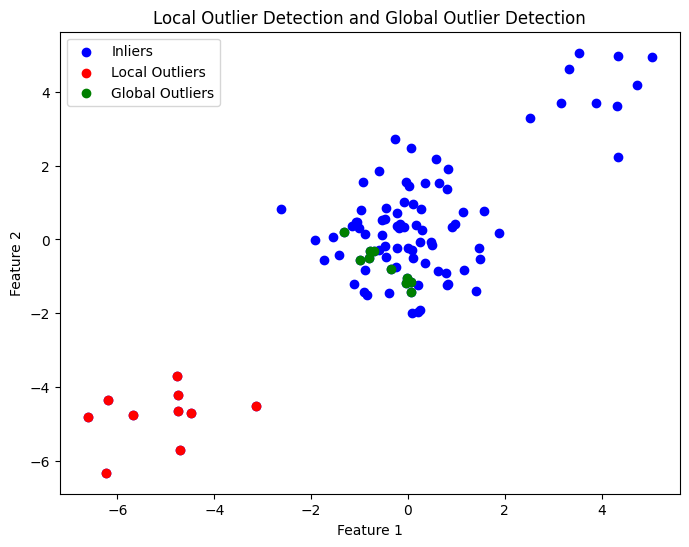

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate random data with outliers
np.random.seed(42)
X = np.random.randn(100, 2)

# Add local outliers
X[20:30] += 4
X[70:80] -= 5

# Fit the LOF model for local outlier detection
local_outlier_detector = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
local_outlier_labels = local_outlier_detector.fit_predict(X)

# Fit the LOF model for global outlier detection
global_outlier_detector = LocalOutlierFactor(n_neighbors=len(X), contamination=0.1)
global_outlier_labels = global_outlier_detector.fit_predict(X)

# Identify local outliers
local_outliers = X[local_outlier_labels == -1]

# Identify global outliers
global_outliers = X[global_outlier_labels == -1]

# Visualize the data points and outliers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='blue', label='Inliers')
plt.scatter(local_outliers[:, 0], local_outliers[:, 1], color='red', label='Local Outliers')
plt.scatter(global_outliers[:, 0], global_outliers[:, 1], color='green', label='Global Outliers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Local Outlier Detection and Global Outlier Detection')
plt.legend()
plt.show()
